In [1]:
# import stuff here
import seaborn as sns
import matplotlib.pyplot as plt
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

from sklearn.metrics import mean_squared_error

In [2]:
import boto3
import pandas as pd
from sagemaker import get_execution_role

def list_data(folder):
    """
    List all available data sets in the folder
    
    """
    s3 = boto3.resource('s3')
    bucket='cp-hackathon-data'
    hackathon_data = s3.Bucket(bucket)
    keys = []
    for obj in hackathon_data.objects.filter(Prefix=folder):
        keys.append(obj.key)
    return keys
def get_data(key):
    role = get_execution_role()
    bucket='cp-hackathon-data'
    data_location = 's3://{}/{}'.format(bucket, key)
    return pd.read_csv(data_location)

In [3]:
list_data('RedCross')

['RedCross/',
 'RedCross/ovitrap_data.csv',
 'RedCross/ovitrap_data_monthly_province.csv',
 'RedCross/weather_data_monthly_province.csv']

# Import mosquitoes data

In [4]:
mosq = get_data('RedCross/ovitrap_data_monthly_province.csv').sort_values(['adm_level', 'date'])

Couldn't call 'get_role' to get Role ARN from role name cp-sagemaker-hackathon-role to get Role path.


In [12]:
mosq.head()

,adm_level,date,count_ovi,mean_ovi,error_ovi,error_relative_ovi
7200,Abra,2012-01-01,0.0,NaN,NaN,NaN
7201,Abra,2012-02-01,0.0,NaN,NaN,NaN
7202,Abra,2012-03-01,0.0,NaN,NaN,NaN
7203,Abra,2012-04-01,0.0,NaN,NaN,NaN
7204,Abra,2012-05-01,0.0,NaN,NaN,NaN


In [55]:
#mosq['date'] = pd.to_datetime(mosq.date).dt.date
mosq['date'] = pd.to_datetime(mosq.date).dt.date

In [56]:
mosq.loc[mosq.count_ovi>0].groupby('adm_level', as_index=False).sum().sort_values('count_ovi', ascending=False).head()

,adm_level,count_ovi,mean_ovi,error_ovi,error_relative_ovi
65,Pangasinan,9615.0,1384.900412,195.895837,8.466437
10,Batangas,6632.0,1160.544314,132.908643,7.757148
66,Quezon,6378.0,1104.754133,126.427465,4.009551
64,Pampanga,5146.0,464.914480,91.345518,6.637146
38,Iloilo,5032.0,1619.130424,161.384422,4.790436


In [57]:
df = mosq.loc[(mosq.adm_level == 'Pangasinan')&(mosq.count_ovi>0)].reset_index()

In [58]:
df.rename(mapper={'index':'old_index'}, axis=1, inplace=True)

In [59]:
df.tail()

,old_index,adm_level,date,count_ovi,mean_ovi,error_ovi,error_relative_ovi
52,1406,Pangasinan,2017-03-01,42.0,17.563333,1.827999,0.104080
53,1407,Pangasinan,2017-04-01,1.0,43.750000,0.000000,0.000000
54,1409,Pangasinan,2017-06-01,1.0,34.380000,0.000000,0.000000
55,1411,Pangasinan,2017-08-01,5.0,18.912000,1.834935,0.097025
56,1412,Pangasinan,2017-09-01,3.0,24.073333,1.513240,0.062860


# Checking for neighboring points

In [60]:
df['next_month'] = df.old_index + 1

In [61]:
df['next_point'] = pd.concat([df.old_index[1:],pd.Series(df.old_index.iloc[-1] + 1)]).reset_index(drop=True)
df['consecutive'] = df.next_point - df.next_month

In [62]:
df

,old_index,adm_level,date,count_ovi,mean_ovi,error_ovi,error_relative_ovi,next_month,next_point,consecutive
0,1350,Pangasinan,2012-07-01,14.0,39.387857,9.259286,0.235080,1351,1354,3
1,1354,Pangasinan,2012-11-01,7.0,4.925714,2.941088,0.597089,1355,1355,0
2,1355,Pangasinan,2012-12-01,5.0,32.540000,16.331001,0.501875,1356,1356,0
3,1356,Pangasinan,2013-01-01,33.0,28.844848,5.559687,0.192745,1357,1357,0
4,1357,Pangasinan,2013-02-01,9.0,45.836667,11.806748,0.257583,1358,1358,0
5,1358,Pangasinan,2013-03-01,2.0,51.070000,13.385531,0.262102,1359,1359,0
6,1359,Pangasinan,2013-04-01,1.0,0.000000,0.000000,NaN,1360,1360,0
7,1360,Pangasinan,2013-05-01,1.0,0.000000,0.000000,NaN,1361,1361,0
8,1361,Pangasinan,2013-06-01,4.0,3.750000,3.247595,0.866025,1362,1362,0
9,1362,Pangasinan,2013-07-01,9.0,43.791111,16.323253,0.372753,1363,1363,0


In [63]:
consecutive = df.iloc[1:43]

In [64]:
consecutive.shape

(42, 10)

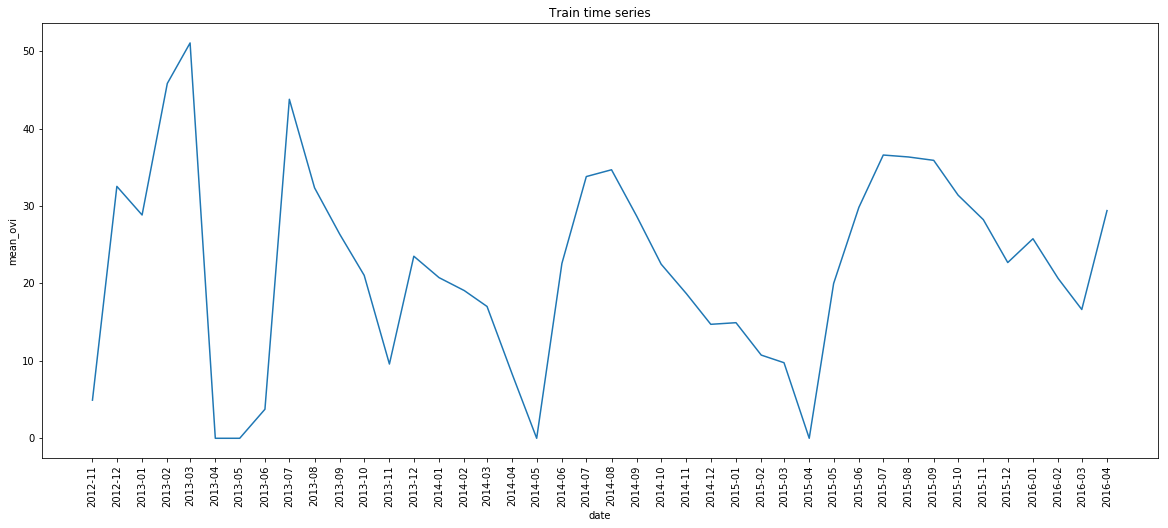

In [65]:
sns.set_context({"figure.figsize": (20, 8)})

dates = consecutive.date
values = consecutive.mean_ovi
plt.figure()
plt.title('Train time series')
sns.lineplot(x=dates, y=values)
plt.xticks(rotation=90)
plt.xticks(dates)
plt.show()

The train set will be the first 42 consecutive data points (excluding the first one of all).
After that there is a break, since there is no valid data point for 2016-05-01.
The test set will be the data points after that breaking point.

In [123]:
train = consecutive[['date', 'mean_ovi']]
test = df[43:][['date', 'mean_ovi']]
train = pd.DataFrame(train, columns=['date','mean_ovi']).set_index('date')
test = pd.DataFrame(test, columns=['date','mean_ovi']).set_index('date')

In [106]:
train.tail()

,mean_ovi
date,
2015-12-01,22.702072
2016-01-01,25.777059
2016-02-01,20.639329
2016-03-01,16.635726
2016-04-01,29.410000


In [107]:
test.head()

,mean_ovi
date,
2016-06-01,38.737222
2016-07-01,37.109107
2016-08-01,35.852651
2016-09-01,29.157500
2016-10-01,27.926964


In [108]:
train.info()
type(train.index)

<class 'pandas.core.frame.DataFrame'>
Index: 42 entries, 2012-11-01 to 2016-04-01
Data columns (total 1 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   mean_ovi  42 non-null     float64
dtypes: float64(1)
memory usage: 672.0+ bytes


pandas.core.indexes.base.Index

We can see that 2016-05-01 is missing, as it should.

Add empty row to test.

In [124]:
empty = pd.DataFrame()
empty['date'] = pd.Series(['2016-05-01'])
empty['date'] = pd.to_datetime(empty['date']).dt.date
empty['mean_ovi'] = np.nan
empty = pd.DataFrame(empty, columns=['date', 'mean_ovi']).set_index('date')
empty

,mean_ovi
date,
2016-05-01,NaN


In [125]:
#test = test.append(pd.Series(name='empty', dtype='float64'), ignore_index=True)
#test = pd.Series(name='empty', dtype='float64').append(test)
#test = pd.concat(pd.Series(name='empty', dtype='float64'), test)
test = pd.concat([empty, test])
test

,mean_ovi
date,
2016-05-01,NaN
2016-06-01,38.737222
2016-07-01,37.109107
2016-08-01,35.852651
2016-09-01,29.157500
2016-10-01,27.926964
2016-11-01,25.230541
2016-12-01,25.885200
2017-01-01,27.825098


## Exponential smoothing

In [126]:
from statsmodels.tsa.holtwinters import ExponentialSmoothing
import numpy as np

In [127]:
model = ExponentialSmoothing(np.asarray(train.mean_ovi), trend=None, seasonal='add', seasonal_periods=12)
#model._index = pd.to_datetime(train.index)

fit1 = model.fit()

/home/ec2-user/anaconda3/envs/python3/lib/python3.6/site-packages/statsmodels/tsa/holtwinters.py:744: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  ConvergenceWarning)


In [137]:
pred1 = fit1.forecast(test.shape[0]) 

train['pred'] = train.mean_ovi
test['pred'] = pred1

In [139]:
pred1

array([27.95045338, 36.91516247, 43.46877677, 43.09138151, 41.90784137,
       36.53148122, 32.39102536, 26.24446311, 28.53501369, 22.90734579,
       18.90501121, 10.12107942, 27.95045338, 36.91516247, 43.46877677])

In [141]:
final = pd.concat([train, test])

In [142]:
final.head()

,mean_ovi,pred
date,,
2012-11-01,4.925714,4.925714
2012-12-01,32.540000,32.540000
2013-01-01,28.844848,28.844848
2013-02-01,45.836667,45.836667
2013-03-01,51.070000,51.070000


In [143]:
final

,mean_ovi,pred
date,,
2012-11-01,4.925714,4.925714
2012-12-01,32.540000,32.540000
2013-01-01,28.844848,28.844848
2013-02-01,45.836667,45.836667
2013-03-01,51.070000,51.070000
2013-04-01,0.000000,0.000000
2013-05-01,0.000000,0.000000
2013-06-01,3.750000,3.750000
2013-07-01,43.791111,43.791111


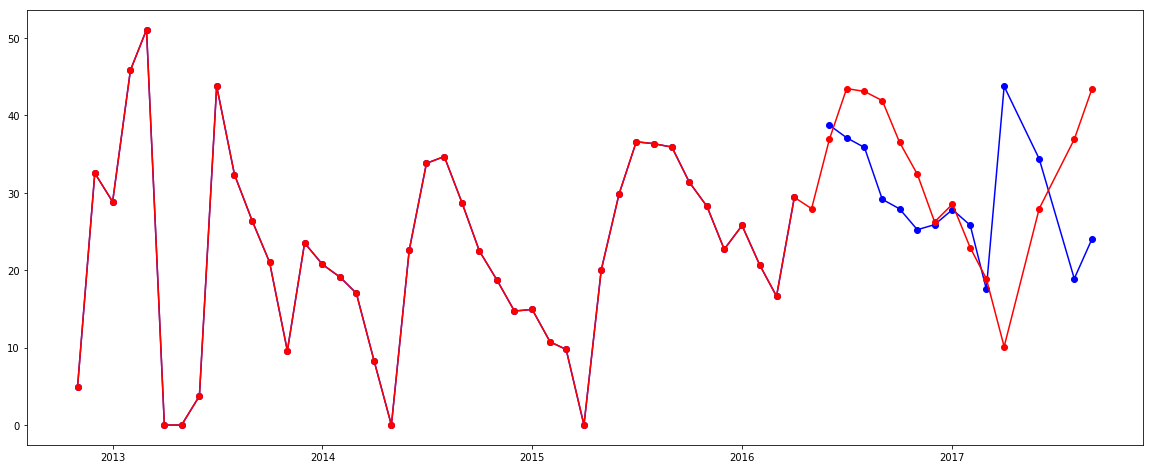

In [148]:
plt.plot(final.index, final.mean_ovi, color = 'blue', label='real', marker = 'o')
plt.plot(final.index, final.pred, color = 'red', label='prediction', marker = 'o')

In [151]:
np.sqrt(mean_squared_error(pred1[1:], test.mean_ovi[1:])) #[1:] to ignore the Nan.

12.726387898337062

## Testing different parameters

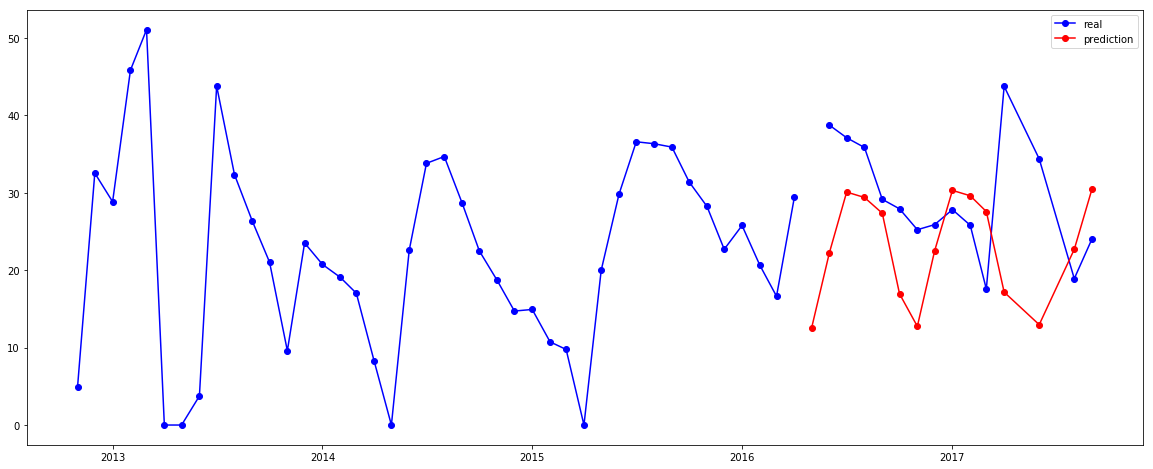

sqrt deviation for s = add, t = add and p = 6:   11.939975359134735


/home/ec2-user/anaconda3/envs/python3/lib/python3.6/site-packages/statsmodels/tsa/holtwinters.py:744: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  ConvergenceWarning)


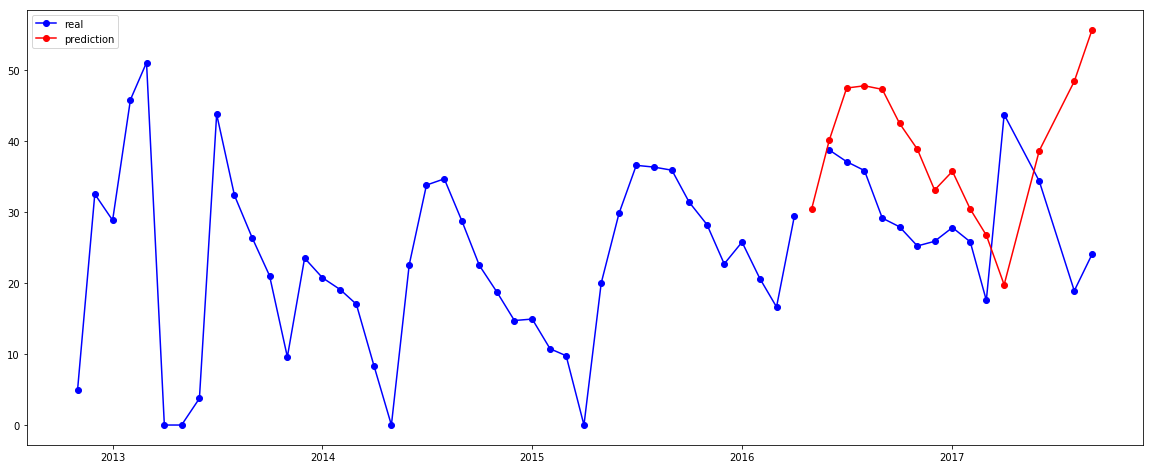

sqrt deviation for s = add, t = add and p = 12:   16.178990932406077


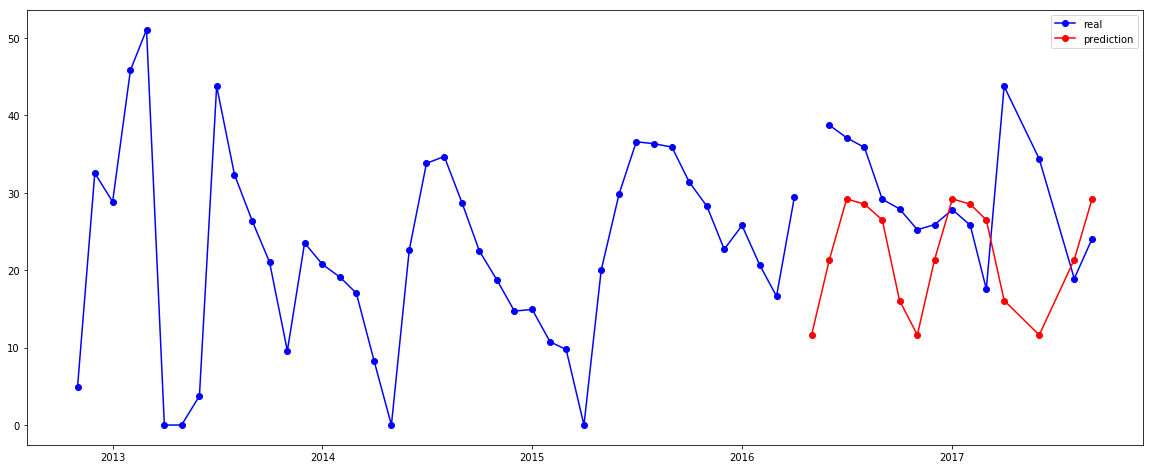

sqrt deviation for s = add, t = None and p = 6:   12.46136231131737


/home/ec2-user/anaconda3/envs/python3/lib/python3.6/site-packages/statsmodels/tsa/holtwinters.py:744: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  ConvergenceWarning)


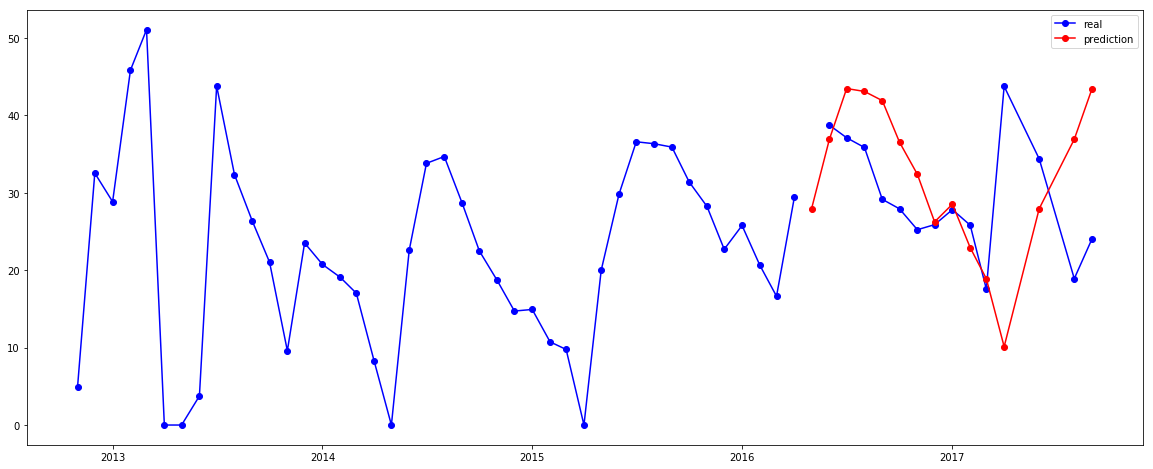

sqrt deviation for s = add, t = None and p = 12:   12.726387898337062


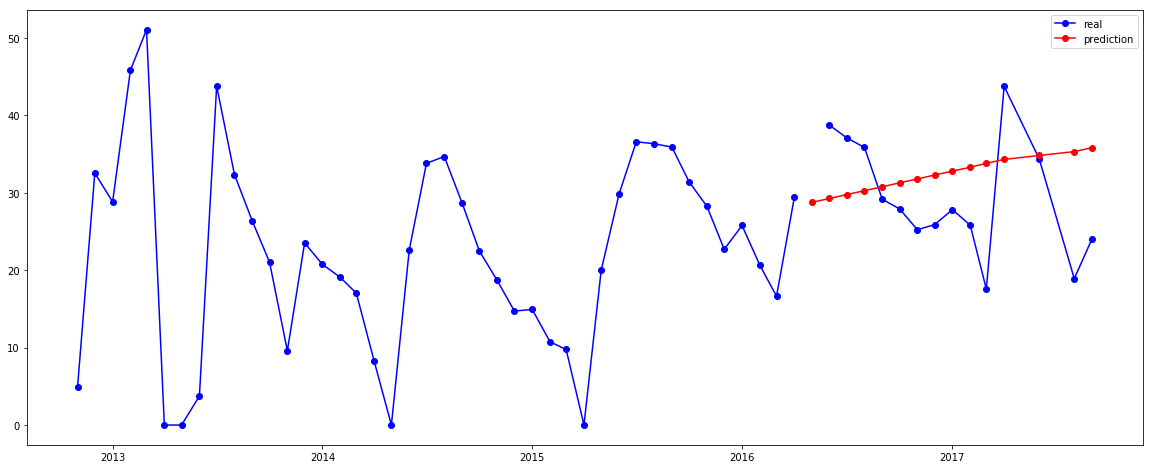

sqrt deviation for s = None, t = add and p = 6:   8.92104835539073


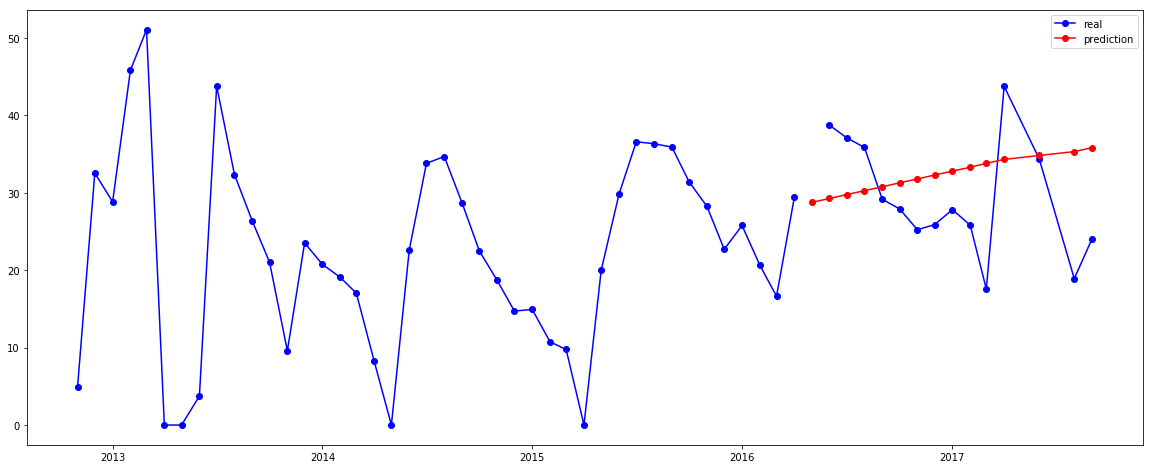

sqrt deviation for s = None, t = add and p = 12:   8.92104835539073


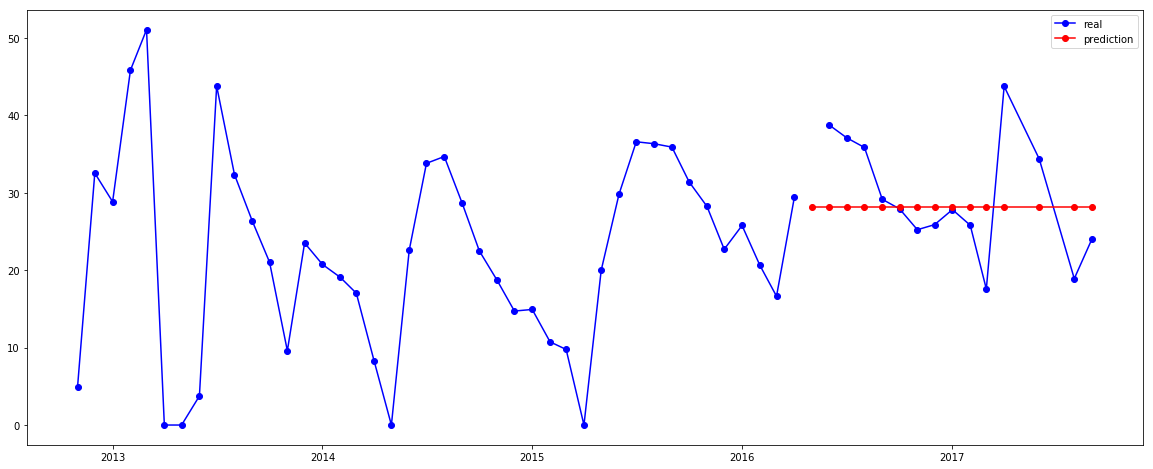

sqrt deviation for s = None, t = None and p = 6:   7.405011076175973


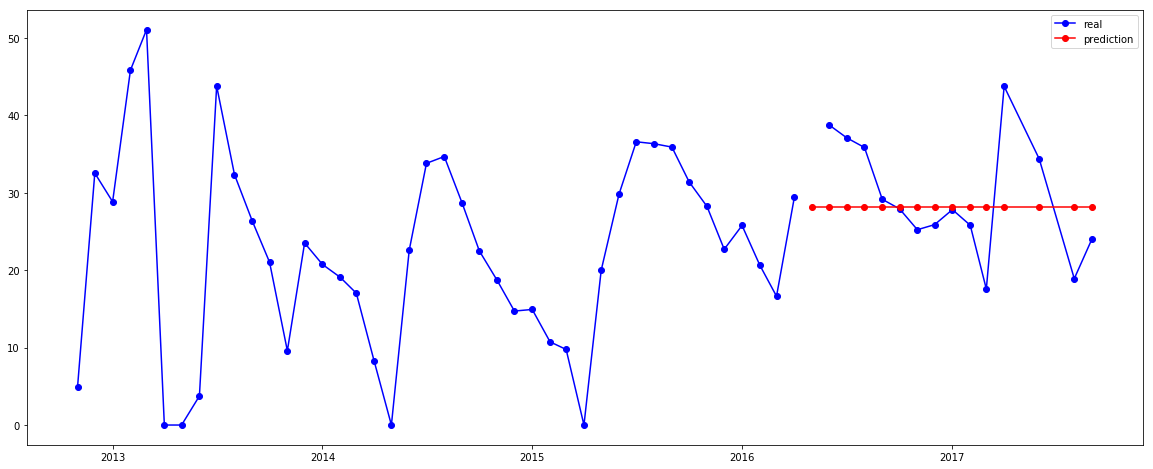

sqrt deviation for s = None, t = None and p = 12:   7.405011076175973


In [157]:
for s in ['add', None]:
    for t in ['add', None]:
        for p in [6, 12]:
            model = ExponentialSmoothing(np.asarray(train.mean_ovi), trend=t, seasonal=s, seasonal_periods=p)
            fit = model.fit()
            pred = fit.forecast(test.shape[0]) # +1 to account for the date which is missing from the test (and train) datasets.
            train['pred'] = train.mean_ovi
            test['pred'] = pred
            final = pd.concat([train, test])
            #plot
            plt.figure()
            plt.plot(final.index, final.mean_ovi, color = 'blue', label='real', marker = 'o')
            #plt.plot(final.index, final.pred, color = 'red', label='prediction', marker = 'o')
            plt.plot(test.index, test.pred, color = 'red', label='prediction', marker = 'o')
            plt.legend(); plt.show()
            #
            print('sqrt deviation for s = {}, t = {} and p = {}:  '.format(s,t,p), np.sqrt(mean_squared_error(pred[1:], test.mean_ovi[1:]))) #[1:] to ignore the Nan.
            #print('sqrt deviation for s = {}, t = {} and p = {}:  '.format(s,t,p), np.sqrt(mean_squared_error(test['pred'], test['mean_ovi'])))

## Conclusion:

The best exponential smoothing model is unsatisfying, and has a sqrt deviation of 7.4, which is worse than the Sarimax approach. So we will drop this and build use the Sarimax model as the baseline model.